In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [33]:
df =pd.read_csv('df_regresion_dataproject.csv', index_col=0)
df.head()

,HORAS_ESTUDIO_SEMANAL,NOTA_ANTERIOR,TASA_ASISTENCIA,HORAS_SUENO,EDAD,NIVEL_DIFICULTAD,TIENE_TUTOR,HORARIO_ESTUDIO_PREFERIDO,ESTILO_APRENDIZAJE,NOTA_FINAL,APROBADO
0,0.331561,0.269009,0.833002,0.445949,0.636364,1.000000,1.0,0.577230,1.000000,84.4,1.0
1,0.418439,0.726082,0.793121,0.102807,0.000000,0.000000,0.0,0.577230,0.000000,72.0,1.0
2,0.146282,0.862624,0.682795,0.625874,0.636364,1.000000,0.0,0.505606,1.000000,80.0,1.0
3,0.235301,0.741118,0.785623,0.765471,0.454545,1.000000,0.0,1.000000,0.449354,78.2,1.0
4,0.000000,0.517917,0.431749,0.445307,0.272727,0.666645,0.0,1.000000,0.792851,66.0,1.0


In [34]:
tv = 'NOTA_FINAL'
X = df.drop(columns=[tv])
y = df[tv]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (800, 10)
X_test shape: (200, 10)


## Entrenamiento

In [36]:
df_modelo = LinearRegression()
df_modelo.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = df_modelo.predict(X_test)

## Validacion

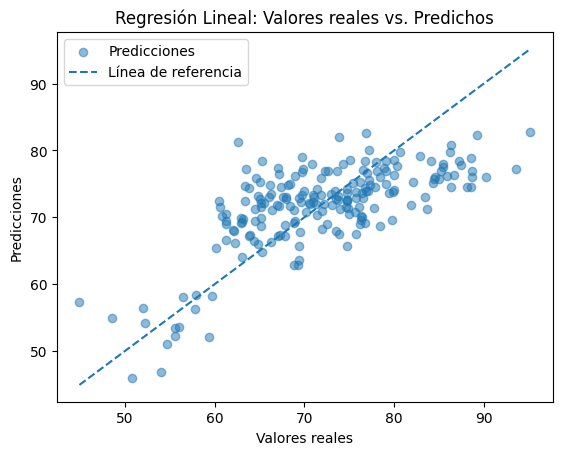

In [38]:
plt.scatter(y_test, y_pred, label='Predicciones', alpha=0.5)

valor_min = min(y_test.min(), y_pred.min())
valor_max = max(y_test.max(), y_pred.max())
plt.plot([valor_min, valor_max], [valor_min, valor_max], '--', label='Línea de referencia')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.legend()
plt.show()

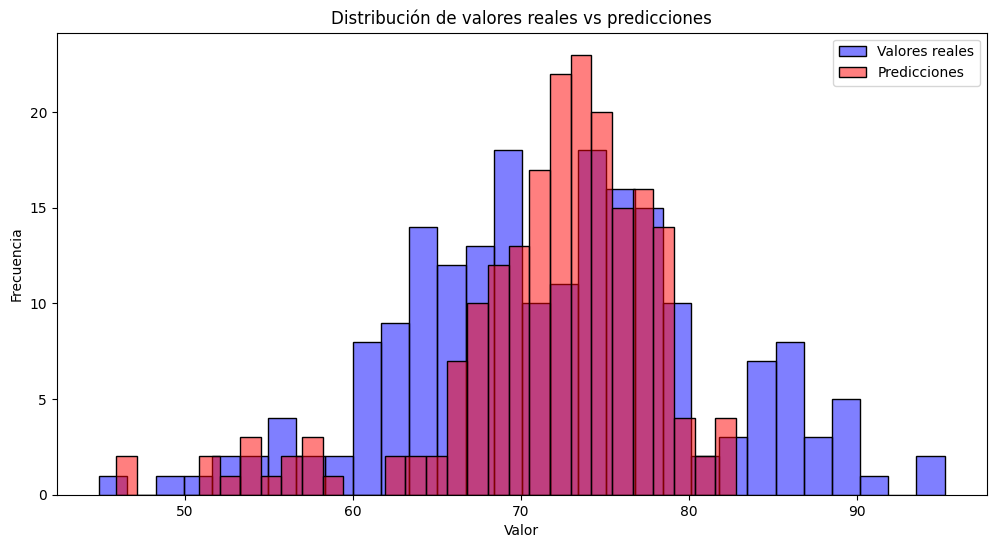

In [39]:
plt.figure(figsize=(12, 6))

n_bins = 30

# Histograma de y_test (azul)
sns.histplot(y_test, bins=n_bins, edgecolor='black', color='blue', alpha=0.5, label='Valores reales')

# Histograma de y_pred (rojo)
sns.histplot(y_pred, bins=n_bins, edgecolor='black', color='red', alpha=0.5, label='Predicciones')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predicciones')
plt.legend()
plt.show()

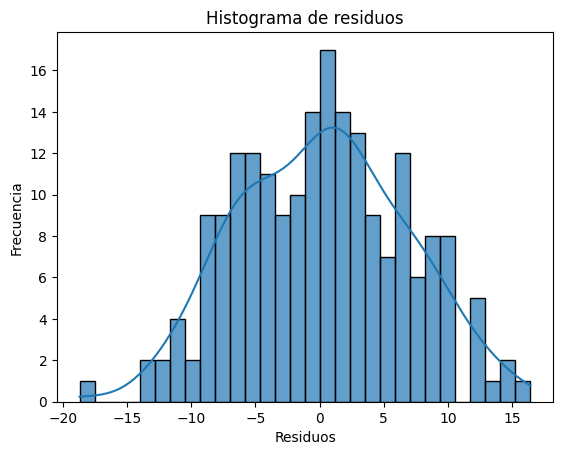

In [40]:
residuos = y_test - y_pred
sns.histplot(residuos, bins=30, kde=True, edgecolor="black", alpha=0.7)

# Etiquetas y título
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos")

# Mostrar gráfico
plt.show()

### Coeficientes

In [41]:
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': df_modelo.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs)

In [42]:
coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

,Feature,Coefficient
9,APROBADO,12.938516
0,HORAS_ESTUDIO_SEMANAL,12.607579
1,NOTA_ANTERIOR,8.772328
2,TASA_ASISTENCIA,5.419351
5,NIVEL_DIFICULTAD,1.891725
8,ESTILO_APRENDIZAJE,1.415761
6,TIENE_TUTOR,0.873994
3,HORAS_SUENO,-0.744459
4,EDAD,0.572915
7,HORARIO_ESTUDIO_PREFERIDO,-0.202760


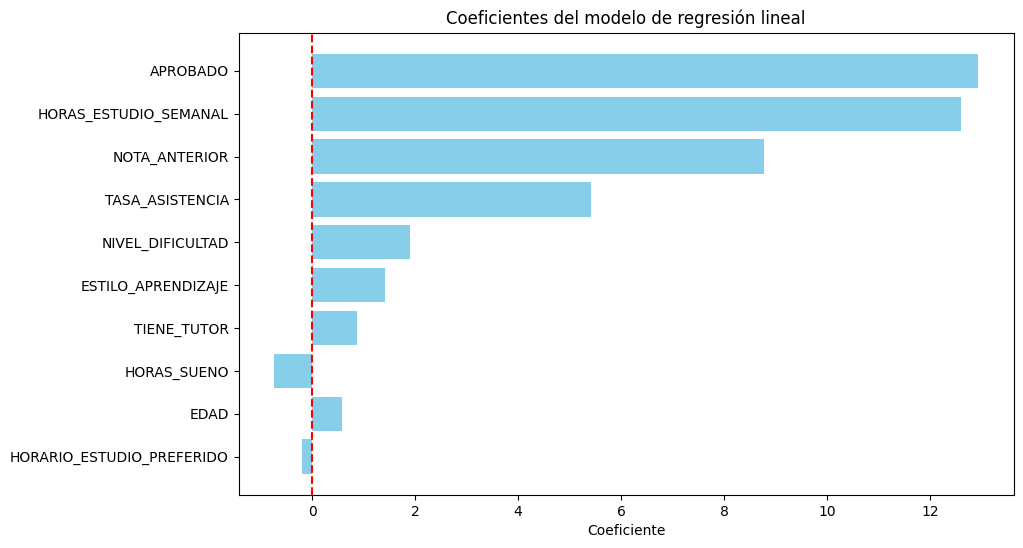

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Coeficientes del modelo de regresión lineal')
plt.axvline(0, color='red', linestyle='--')
plt.show()

### Metricas

In [44]:
y_train_pred = df_modelo.predict(X_train)
y_test_pred = df_modelo.predict(X_test)

In [45]:
metricas = {
    "train": {
        "R²": r2_score(y_train, y_train_pred),
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "MSE": mean_squared_error(y_train, y_train_pred),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    },
    "test": {
        "R²": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "MSE": mean_squared_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    },
}

In [46]:
df_metricas = pd.DataFrame(metricas).T
df_metricas.round(2)

,R²,MAE,MSE,RMSE
train,0.54,5.28,43.43,6.59
test,0.49,5.27,41.85,6.47


In [47]:
import joblib

modelo_final = LinearRegression()
modelo_final.fit(X, y)
joblib.dump(modelo_final, 'modelo_final_regresion.pkl')

['modelo_final_regresion.pkl']

In [48]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [49]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
}

In [50]:
metrics_results = {}

In [51]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_results[name] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }

In [53]:
df_metricas = pd.DataFrame(metrics_results).T
df_metricas = df_metricas.round(2)
df_metricas

,Train R²,Train MAE,Train RMSE,Test R²,Test MAE,Test RMSE
Linear,0.54,5.28,6.59,0.49,5.27,6.47
Ridge,0.54,5.28,6.59,0.49,5.27,6.46
Lasso,0.53,5.31,6.64,0.49,5.27,6.45
ElasticNet,0.48,5.65,6.99,0.45,5.44,6.71
